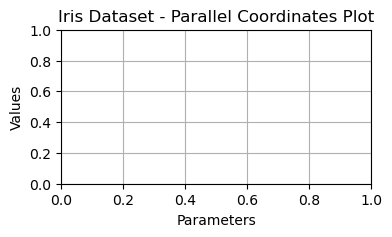

In [293]:
import matplotlib.pyplot as plt
import pandas as pd

# Load the iris dataset
data = pd.read_csv("iris.csv")

# Create the parallel coordinates plot
plt.figure(figsize=(4,2))
plt.xlabel("Parameters")
plt.ylabel("Values")
plt.title("Iris Dataset - Parallel Coordinates Plot")
plt.grid()



In [294]:
data['sepal.length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal.length, Length: 150, dtype: float64

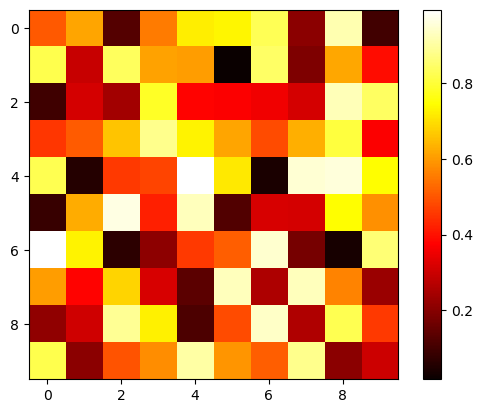

In [295]:
import numpy as np
import matplotlib.pyplot as plt

# Create some data to plot
data = np.random.rand(10,10)

# Create the heatmap
fig, ax = plt.subplots()
im = ax.imshow(data, cmap='hot')

# Add colorbar
fig.colorbar(im)

# Show the plot
plt.show()

data

In [296]:
data[['env.mu','env.sigma']]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

C:\Users\A00006846\AppData\Local\Temp\ipykernel_17812\276811765.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pivot = data_normal[data['buffer.name']=="DDPG"].pivot_table(values='AdjAccuracy', index='env.mu', columns='env.sigma')


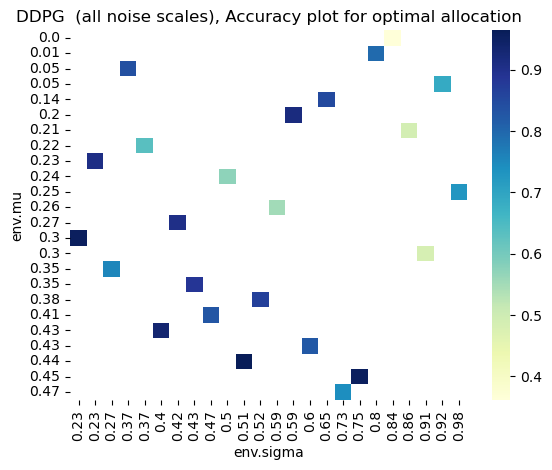

In [ ]:
import seaborn as sns
import numpy as np
data = pd.read_csv("runs_large_mu.csv",sep=',',header='infer')
data["AdjAccuracy"] = abs(1- abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex'])
data_normal = data[abs(data['AdjAccuracy'])<1]
df_pivot = data_normal[data['buffer.name']=="DDPG"].pivot_table(values='AdjAccuracy', index='env.mu', columns='env.sigma')

# Create the heatmap
ax = sns.heatmap(df_pivot, cmap='YlGnBu', fmt='.2f')
plt.title('DDPG  (all noise scales), Accuracy plot for optimal allocation')
# round the data to 2 decimal places
xticklabels = [float(label.get_text()) for label in ax.get_xticklabels()]
yticklabels = [float(label.get_text()) for label in ax.get_yticklabels()]
x_tick_labels =  np.round(xticklabels, 2)
y_tick_labels =  np.round(yticklabels, 2)

# format the x and y tick labels
ax.set_xticklabels(x_tick_labels)
ax.set_yticklabels(y_tick_labels)
#ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Show the plot
plt.show()


C:\Users\A00006846\AppData\Local\Temp\ipykernel_17812\1246318427.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_pivot = data_normal[data['buffer.name']=="DDPG"].pivot_table(values='AdjAccuracy', index='env.mu', columns='env.sigma')


TypeError: heatmap() missing 1 required positional argument: 'data'

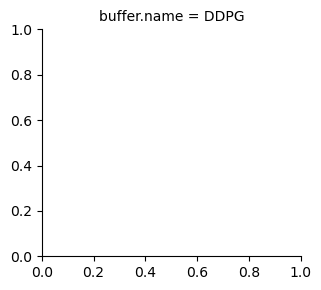

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("runs_large_mu.csv",sep=',',header='infer')
data["AdjAccuracy"] = abs(1- abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex'])
data_normal = data[abs(data['AdjAccuracy'])<1]
df_pivot = data_normal[data['buffer.name']=="DDPG"].pivot_table(values='AdjAccuracy', index='env.mu', columns='env.sigma')
g = sns.FacetGrid(data_normal, col='buffer.name', col_wrap=3, height=3)
g = g.map(sns.heatmap, 'env.mu', 'env.sigma', 'AdjAccuracy', cmap='YlGnBu')
# Create the heatmap
#ax = sns.heatmap(df_pivot, cmap='YlGnBu', fmt='.2f')
plt.title('DDPG  (all noise scales), Accuracy plot for optimal allocation')
# round the data to 2 decimal places
xticklabels = [float(label.get_text()) for label in ax.get_xticklabels()]
yticklabels = [float(label.get_text()) for label in ax.get_yticklabels()]
x_tick_labels =  np.round(xticklabels, 2)
y_tick_labels =  np.round(yticklabels, 2)

# format the x and y tick labels
g.set_xticklabels(x_tick_labels)
g.set_yticklabels(y_tick_labels)
#ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))
#ax.yaxis.set_major_formatter(plt.FormatStrFormatter('%.2f'))

# Show the plot
plt.show()

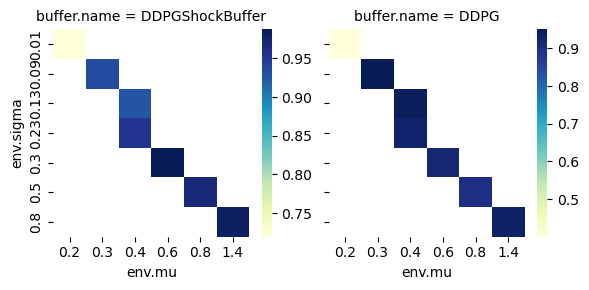

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("runs.csv",sep=';',header='infer')
data["AdjAccuracy"] = abs(1- abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex'])
data_normal = data[abs(data['AdjAccuracy'])<1]
data_normal = data_normal.reset_index()
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(values='AdjAccuracy', index='env.mu', columns='env.sigma')
    sns.heatmap(d, **kwargs)


g = sns.FacetGrid(data_normal, col='buffer.name')
g.map_dataframe(draw_heatmap,'env.mu', 'env.sigma', 'AdjAccuracy', cmap='YlGnBu')

c:\Winapp\Anaconda\envs\rl\lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


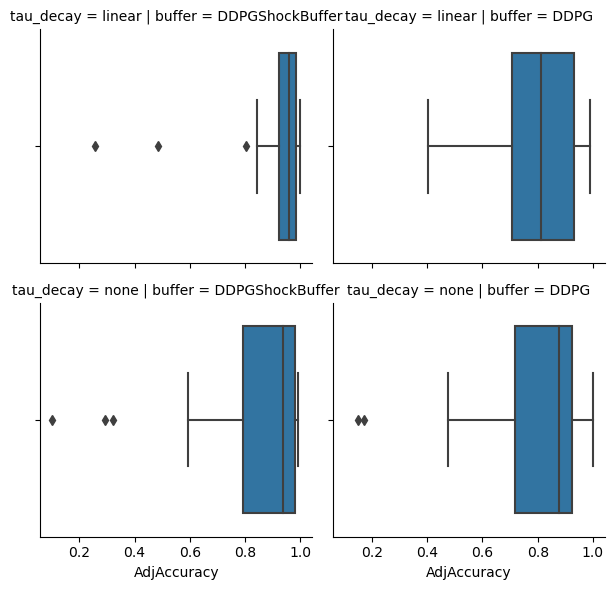

In [51]:
import seaborn as sns
import pandas as pd


data = pd.read_csv("runs_powut_large_mu.csv",sep=',',header='infer')
data["error"] = abs(data['A_Value']-data['A_Value_Ex'])/data['A_Value_Ex']
data['AdjAccuracy']= 1-data["error"].clip(upper=1)
data = data[abs(data['AdjAccuracy'])>0]
data = data[abs(data['A_Value_Ex'])<1]
data = data[data['env.b']<1]

data['buffer'] = data['buffer.name']
data['tau_decay'] = data['ddpg.tau_decay']
data_abnormal = data[abs(data['AdjAccuracy'])<1]

g = sns.FacetGrid(data_abnormal, col='buffer', row='tau_decay', height=3)
g.map(sns.boxplot, 'AdjAccuracy')
#sns.boxplot(x='buffer.name', y='AdjAccuracy', data=data)


# Show the plot
plt.show()

<AxesSubplot:>

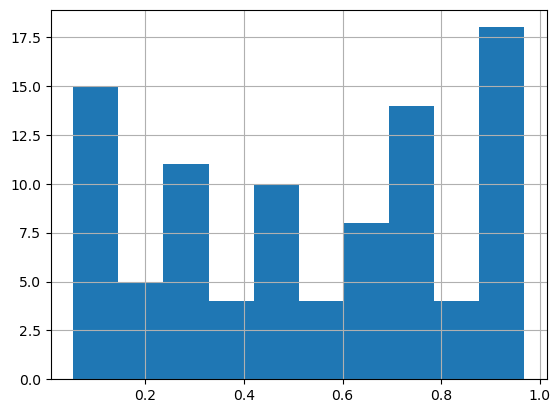

In [52]:
data['A_Value_Ex'].hist()

C:\Users\A00006846\AppData\Local\Temp\ipykernel_3516\1354861475.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mu'] = pd.cut(data['env.mu'], mu).apply(lambda x: x.left)
C:\Users\A00006846\AppData\Local\Temp\ipykernel_3516\1354861475.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sigma'] = pd.cut(data['env.sigma'], sigma).apply(lambda x: x.left)
C:\Users\A00006846\AppData\Local\Temp\ipykernel_3516\1354861475.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

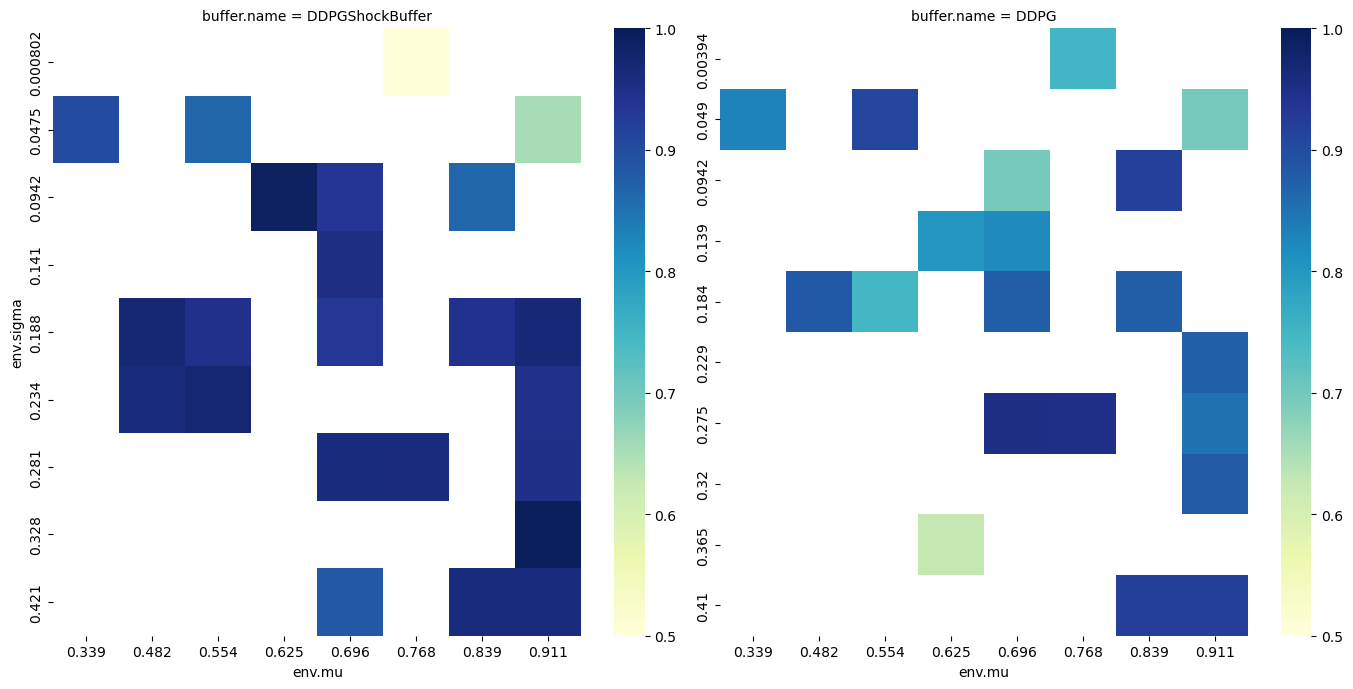

In [36]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("runs_log.csv",sep=',',header='infer')
data['error'] = (abs(data['A_Value_Smooth']-data['A_Value_Ex'])/abs(data['A_Value_Ex']))
data['AdjAccuracy']=1-(data["error"].clip(upper=1))
data = data[abs(data['A_Value_Ex'])<1]
data = data[abs(data['AdjAccuracy'])>0]
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    _,mu = np.histogram(data['env.mu'])
    _,sigma = np.histogram(data['env.sigma'])
    data['mu'] = pd.cut(data['env.mu'], mu).apply(lambda x: x.left)
    #data['mu'] = (data['mu'].astype(str)).str.slice[:3]
    data['sigma'] = pd.cut(data['env.sigma'], sigma).apply(lambda x: x.left)
    d = data.pivot_table(values='AdjAccuracy', index='mu', columns='sigma',aggfunc='median')
    #kwargs.update({'cbar_kws': {'ticks':[0.3,1.0]}})
    ax = sns.heatmap(d,  cmap='YlGnBu',vmin=0.5,vmax=1.0)
    

g = sns.FacetGrid(data, col='buffer.name',height=7,aspect=1,sharey=False)


g.map_dataframe(draw_heatmap,'env.mu', 'env.sigma', 'AdjAccuracy', cmap='YlGnBu')

vmin, vmax = data['AdjAccuracy'].min(), data['AdjAccuracy'].max()

plt.yticks(rotation=90)
for ax in g.axes.flat:
    continue
    ax.set_yticks(ax.get_yticks()[::2])
    ax.set_xticks(ax.get_xticks()[::2])





In [27]:
data = pd.read_csv("runs_powut_large_mu.csv",sep=',',header='infer')
data = data[abs(data['env.b'])<1]
data[data['buffer.name']=='DDPGShockBuffer'].count(),data[data['buffer.name']=='DDPG'].count()

(Start Time                              26
 Duration                                26
 Run ID                                  26
 Name                                    26
 Source Type                             26
 Source Name                             26
 User                                    26
 Status                                  26
 Accuracy                                26
 a_variables                             26
 buffer.name                             26
 ddpg.a.name                             26
 ddpg.noise_decay                        26
 ddpg.q.name                             26
 ddpg.q.variables                        26
 ddpg.tau_decay                          26
 env.U_2                                 26
 env.name                                26
 general_settings.batch_size_increase    26
 name                                    26
 q_variables                             26
 A loss                                  26
 A_Value                        

C:\Users\A00006846\AppData\Local\Temp\ipykernel_3516\3274849501.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["error"] = (abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex']).clip(upper=1)
C:\Users\A00006846\AppData\Local\Temp\ipykernel_3516\3274849501.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["AdjAccuracy"] =1-data["error"]
C:\Users\A00006846\AppData\Local\Temp\ipykernel_3516\3274849501.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

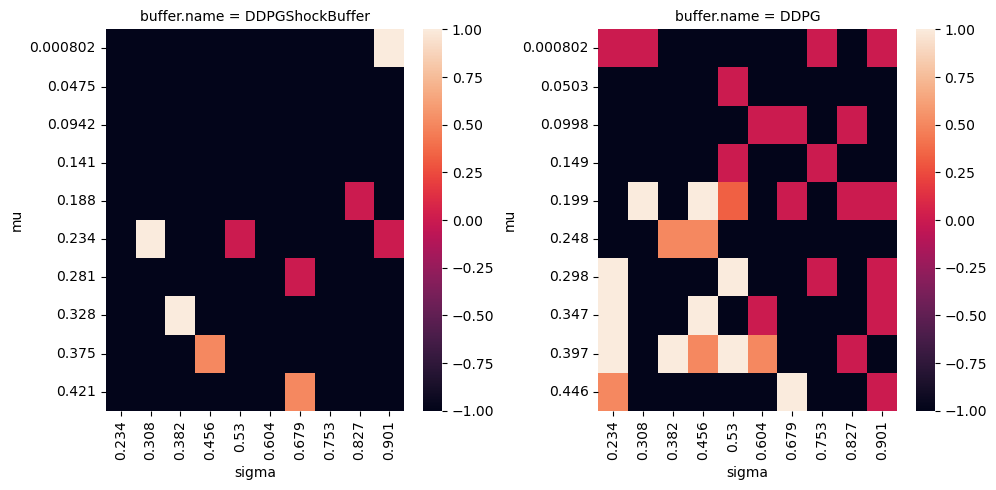

In [9]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("runs_log.csv",sep=',',header='infer')
data["error"] = (abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex']).clip(upper=1)
data["AdjAccuracy"] =1-data["error"]
data['values']=1
data_filter = data#[abs(data['AdjAccuracy'])<0.1]

def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    data["error"] = (abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex']).clip(upper=1)
    data["AdjAccuracy"] =1-data["error"]
    data.loc[data['AdjAccuracy']>0,'AdjAccuracy']=1
    _,mu = np.histogram(data['env.mu'])
    _,sigma = np.histogram(data['env.sigma'])
    data['mu'] = pd.cut(data['env.mu'], mu).apply(lambda x: x.left)
    data['sigma'] = pd.cut(data['env.sigma'], sigma).apply(lambda x: x.left)
    d = pd.pivot_table(data,
                        index='mu',
                        columns='sigma', 
                        values='AdjAccuracy', 
                        aggfunc='sum')
    d1 = pd.pivot_table(data,
                        index='mu',
                        columns='sigma', 
                        values='AdjAccuracy', 
                        aggfunc='count')                       

    d2 = d/d1
    
    d2=1-d2
    d2.fillna(-1,inplace=True)
    sns.heatmap(d2)


g = sns.FacetGrid(data_filter, col='buffer.name',height=5,aspect=1,sharey=False)
g.map_dataframe(draw_heatmap,)

C:\Users\A00006846\AppData\Local\Temp\ipykernel_17812\394066653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mbys2'] = data['env.mu']/data['env.sigma']
C:\Users\A00006846\AppData\Local\Temp\ipykernel_17812\394066653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["AdjAccuracy"] = abs(1- abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex'])


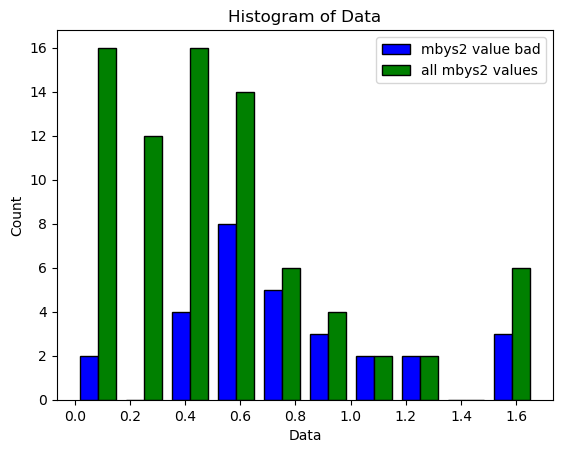

C:\Users\A00006846\AppData\Local\Temp\ipykernel_17812\394066653.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['mbys2'] = data['env.mu']/data['env.sigma']
C:\Users\A00006846\AppData\Local\Temp\ipykernel_17812\394066653.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["AdjAccuracy"] = abs(1- abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex'])


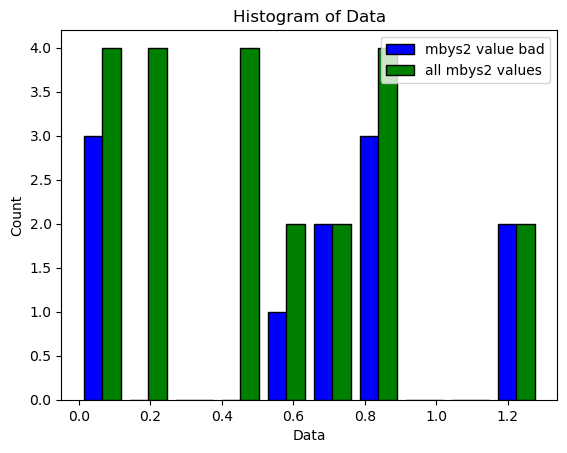

In [330]:
dat = pd.read_csv("runs_log.csv",sep=',',header='infer')
def filter(value,dat):
    data= dat[dat['buffer.name']==value]

    data['mbys2'] = data['env.mu']/data['env.sigma']
    data["AdjAccuracy"] = abs(1- abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex'])

    data_filter = data[abs(data['AdjAccuracy'])>2]


    plt.hist([data_filter['mbys2'],data['mbys2']], color=['blue','green'], edgecolor='black', label=['mbys2 value bad','all mbys2 values'])

    # Add labels
    plt.xlabel('Data')
    plt.ylabel('Count')
    plt.title('Histogram of Data')
    plt.legend()

    # Show the plot
    plt.show()

filter('DDPG',dat)
filter('DDPGShockBuffer',dat)

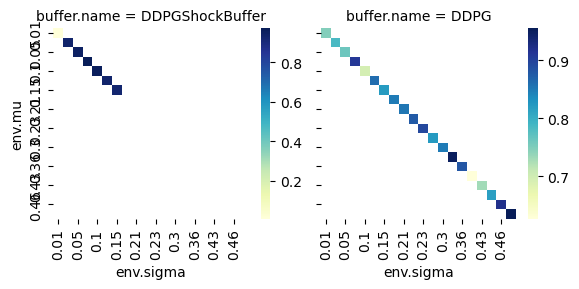

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv("runs_log.csv",sep=',',header='infer')
data["AdjAccuracy"] = abs(1- abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex'])
data['mu'] = data['env.mu'].round(2)
data['sigma'] = data['env.mu'].round(2)
data_normal = data[abs(data['AdjAccuracy'])<1]
data_normal = data_normal.reset_index()
def draw_heatmap(*args, **kwargs):
    data = kwargs.pop('data')
    d = data.pivot_table(values='AdjAccuracy', index='mu', columns='sigma')
    sns.heatmap(d, **kwargs)
    

    # format the x and y tick labels
    #g.set_xticklabels(x_tick_labels)
    #g.set_yticklabels(y_tick_labels)


g = sns.FacetGrid(data_normal, col='buffer.name')
g.map_dataframe(draw_heatmap,'env.sigma', 'env.mu', 'AdjAccuracy', cmap='YlGnBu')

C:\Users\A00006846\AppData\Local\Temp\ipykernel_17812\2424736770.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filter['values'] = 1


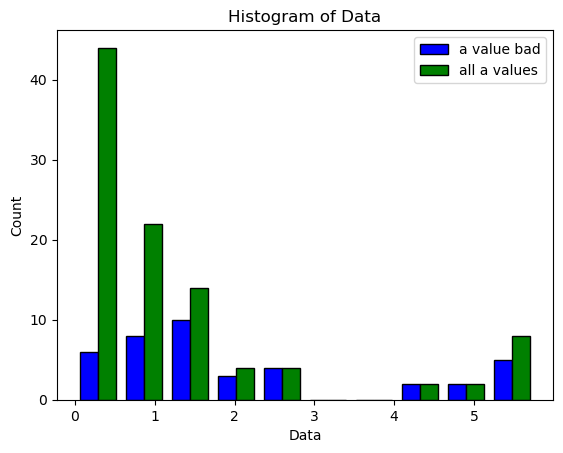

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv("runs_log.csv",sep=',',header='infer')
data["AdjAccuracy"] = abs(1- abs(data['A_Value_Smooth']-data['A_Value_Ex'])/data['A_Value_Ex'])

data_filter = data[abs(data['AdjAccuracy'])>2]
data_filter['values'] = 1

plt.hist([data_filter['A_Value_Ex'],data['A_Value_Ex']], color=['blue','green'], edgecolor='black', label=['a value bad','all a values'])

# Add labels
plt.xlabel('Data')
plt.ylabel('Count')
plt.title('Histogram of Data')
plt.legend()

# Show the plot
plt.show()

In [ ]:
data_filter[['env.b','A_Value_Smooth','A_Value_Ex']].sort_values(by=['env.b'])
d1=(data['env.b']>1.0)
d2=(data_filter['env.b']>1.0)
data[d1]['Start Time'].count(),data_filter[d2]['Start Time'].count()

(37, 37)

In [ ]:
data_filter['A_Value_Ex'].quantile([0.,0.2,0.4,0.5,0.6,0.8,.9])

0.0    0.001127
0.2    0.817793
0.4    1.301304
0.5    1.531555
0.6    1.763372
0.8    4.235563
0.9    5.358937
Name: A_Value_Ex, dtype: float64

In [ ]:
_,mu = np.histogram(data['env.mu'])
_,sigma = np.histogram(data['env.sigma'])
data['mu'] = pd.cut(data['env.mu'], mu)
data['sigma'] = pd.cut(data['env.sigma'], sigma)

data['mu']

0         (0.347, 0.397]
1         (0.248, 0.298]
2         (0.248, 0.298]
3         (0.347, 0.397]
4         (0.347, 0.397]
             ...        
82        (0.248, 0.298]
83        (0.446, 0.496]
84        (0.446, 0.496]
85    (0.000802, 0.0503]
86    (0.000802, 0.0503]
Name: mu, Length: 87, dtype: category
Categories (10, interval[float64, right]): [(0.000802, 0.0503] < (0.0503, 0.0998] < (0.0998, 0.149] < (0.149, 0.199] ... (0.298, 0.347] < (0.347, 0.397] < (0.397, 0.446] < (0.446, 0.496]]

In [ ]:
data['general_settings.max_episodes']

0     10000
1     10000
2     10000
3     10000
4     10000
5     10000
6     10000
7     10000
8     10000
9     10000
10    10000
11    10000
12    10000
13    10000
14    10000
15    10000
16    10000
17    10000
18    10000
19    10000
20    10000
21    10000
22    10000
23    10000
24    10000
25    10000
26    10000
27    10000
Name: general_settings.max_episodes, dtype: int64

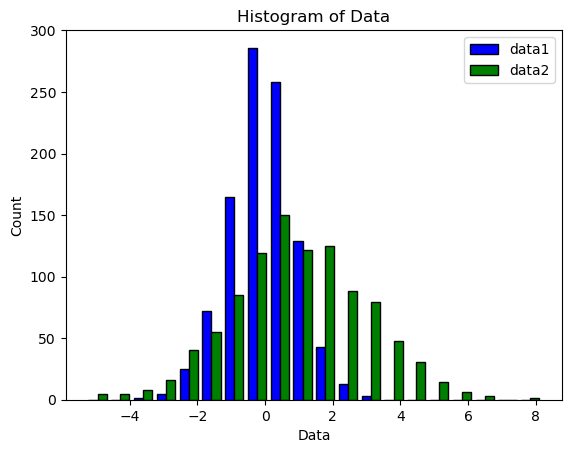

In [ ]:
data1 = np.random.normal(0, 1, 1000)
data2 = np.random.normal(1, 2, 1000)

# Create the histogram
plt.hist([data1, data2], bins=20, color=['blue', 'green'], edgecolor='black', label=['data1', 'data2'])

# Add labels
plt.xlabel('Data')
plt.ylabel('Count')
plt.title('Histogram of Data')
plt.legend()

# Show the plot
plt.show()

In [ ]:
%pip install seaborn

     -------------------------------------- 293.3/293.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
